In [143]:
import numpy as np
from sklearn.datasets import make_blobs,make_classification
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



In [115]:
X,Y1 = make_blobs(n_samples = 100, centers = 2, n_features = 2,random_state = 0)
import random
for i in range(len(X)):
  X[i] = X[i] * random.random()
print(X.shape)
print(Y1.shape)
Y = []
for i in Y1:
  if  i == 1:
    Y.append(1)
  elif i == 0:
    Y.append(-1)
Y = np.array(Y)

print(X.shape)
print(Y.shape)

(100, 2)
(100,)
(100, 2)
(100,)


In [144]:
random_data = pd.DataFrame(np.hstack((X,Y.reshape(len(Y),1))),columns = ['X1','X2','Y'])
random_data_AdaBoost = random_data.to_csv("random_data_AdaBoost.csv",index=None)


In [145]:
random_data_df = pd.read_csv("random_data_AdaBoost.csv")
random_data_df.head()

,X1,X2,Y
0,3.750167,1.986152,1.0
1,0.137260,0.069529,1.0
2,-0.146899,2.699340,-1.0
3,0.012512,0.328482,-1.0
4,2.205908,0.826107,1.0


In [146]:
X = random_data_df.iloc[:,:2].values
Y = random_data_df.iloc[:,2].values
print(X.shape)
print(Y.shape)

(100, 2)
(100,)


Text(0, 0.5, 'x2')

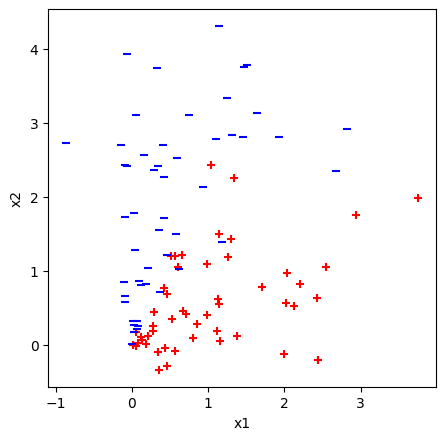

In [147]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
fig.set_facecolor('white')
X_posit = X[Y==1]
ax.scatter(*X_posit.T,marker='+',color='red')
X_negat = X[Y==-1]
ax.scatter(*X_negat.T,marker='_',color='blue')
ax.set_xlabel("x1")
ax.set_ylabel("x2")


In [170]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,shuffle=True)

In [171]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(80, 2)
(20, 2)
(80,)
(20,)


after splitting


Text(0, 0.5, 'x2')

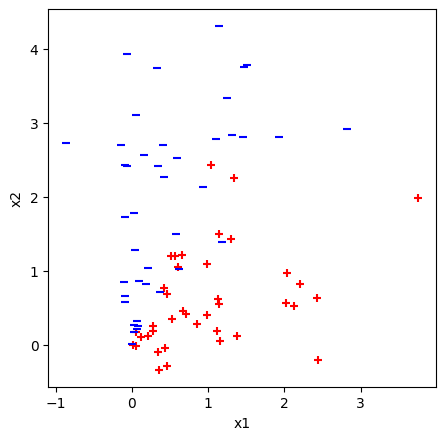

In [172]:
print("after splitting")
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
fig.set_facecolor('white')
X_train_pos = X_train[Y_train==1]
ax.scatter(*X_train_pos.T,marker='+',color='red')
X_train_neg = X_train[Y_train==-1]
ax.scatter(*X_train_neg.T,marker='_',color='blue')
ax.set_xlabel("x1")
ax.set_ylabel("x2")


In [173]:
def AdaBoost(X,Y,T):

    D = np.zeros((T,len(X))) #storing each stage's sample weights
    D[0] = np.array([1/len(X) for i in range(len(X))])

    store_all_stage_errors = np.zeros(T)
    store_all_stage_stumps = np.zeros(T, dtype=object)
    store_w_t_stages = np.zeros(T)


    for t in range(T):
      classifier = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes = 2) #stump
      D_to_use = D[t]
      h_t_x_fitter = classifier.fit(X, Y, sample_weight = D_to_use)
      h_t_x = h_t_x_fitter.predict(X)

      E_t = np.sum([D_to_use[i] if Y[i]!=h_t_x[i] else 0 for i in range(0,len(X))])

      w_t = (1/2) * np.log((1/E_t)-1)

      D_next = (D_to_use * np.exp(- w_t * Y * h_t_x)) / np.sum(D_to_use * np.exp(- w_t * Y * h_t_x))

      store_all_stage_errors[t] = E_t
      store_all_stage_stumps[t] = h_t_x_fitter
      store_w_t_stages[t] = w_t 


      if t+1 < T :
        D[t+1] = D_next

    h_s_x = np.sign(np.dot(store_w_t_stages,np.array([h_t_x_clf.predict(X) for h_t_x_clf in store_all_stage_stumps])))

    return h_s_x,store_all_stage_errors,store_all_stage_stumps,store_w_t_stages,D





In [174]:
T=10
h_s_x,store_all_stage_errors,store_all_stage_stumps,store_w_t_stages,D = AdaBoost(X_train,Y_train,T)


In [175]:
y_pred_train = h_s_x
print(y_pred_train)

[-1. -1.  1. -1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1. -1. -1. -1.
 -1. -1.  1.  1. -1.  1.  1. -1. -1.  1.  1.  1.  1.  1. -1.  1. -1.  1.
  1.  1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.
  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1.  1.
 -1.  1.  1.  1. -1. -1.  1.  1.]


In [176]:
print(Y_train)

[-1. -1.  1. -1. -1. -1.  1. -1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1.  1. -1.  1.  1. -1. -1.  1.  1.  1.  1.  1. -1.  1. -1.  1.
  1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1. -1.  1. -1.
  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1.  1.
 -1.  1.  1.  1. -1. -1.  1.  1.]


In [177]:
def predict(X,stump_weights,stumps,flag):
    if flag == 0:
      stump_preds = np.array(stumps.predict(X))
    elif flag ==1:
      stump_preds = np.array([stump.predict(X) for stump in stumps])
    return np.sign(np.dot(stump_weights, stump_preds))

In [178]:
def plot_adaboost(X,Y,clf,sample_weights,stump_weights,ax,flag):

  if not ax:
    fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
    fig.set_facecolor('white')

  pad = 1
  x_min,x_max = X[:,0].min() - pad , X[:,0].max() + pad
  y_min,y_max = X[:,1].min() - pad , X[:,1].max() + pad

  X_pos = X[Y==1]
  ax.scatter(*X_pos.T,marker='+',color='red')

  X_neg = X[Y==-1]
  ax.scatter(*X_neg.T,marker="_",c='blue')

  plot_step = 0.01
  xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),np.arange(y_min,y_max,plot_step))

  Z = predict(np.c_[xx.ravel(),yy.ravel()],stump_weights,clf,flag)
  Z = Z.reshape(xx.shape)


  if list(np.unique(Z)) == [1]:
    fill_colors = ['r']

  else:
    fill_colors = ['b','r']

  ax.contourf(xx,yy,Z,colors=fill_colors,alpha=0.2)


  ax.set_xlim(x_min+0.5,x_max-0.5)
  ax.set_ylim(y_min+0.5,y_max-0.5)

  ax.set_xlabel('$x_1$')
  ax.set_ylabel('$x_2$')








In [179]:
def plotter(X,Y,store_all_stage_stumps,D,store_w_t_stages,T):

  fig, axes = plt.subplots(figsize=(8, T*3),nrows=T,ncols=2,sharex=True,dpi=100)
  fig.set_facecolor('white')
  _ = fig.suptitle('Decision boundaries per stage')

  for t in range(T):
    ax1,ax2 = axes[t]

    #weak learner
    
    _ = ax1.set_title(f'Weak learner at t={t+1}')

    plot_adaboost(X,Y,store_all_stage_stumps[t],D[t],store_w_t_stages[t],ax1,flag=0)

    #cummulative learner

    _ = ax2.set_title(f'Cummulative learner at t={t+1}')

    plot_adaboost(X,Y,store_all_stage_stumps[0:t+1],D[t],store_w_t_stages[0:t+1],ax2,flag=1)


  plt.subplots_adjust(top=0.95)
  plt.show()
  






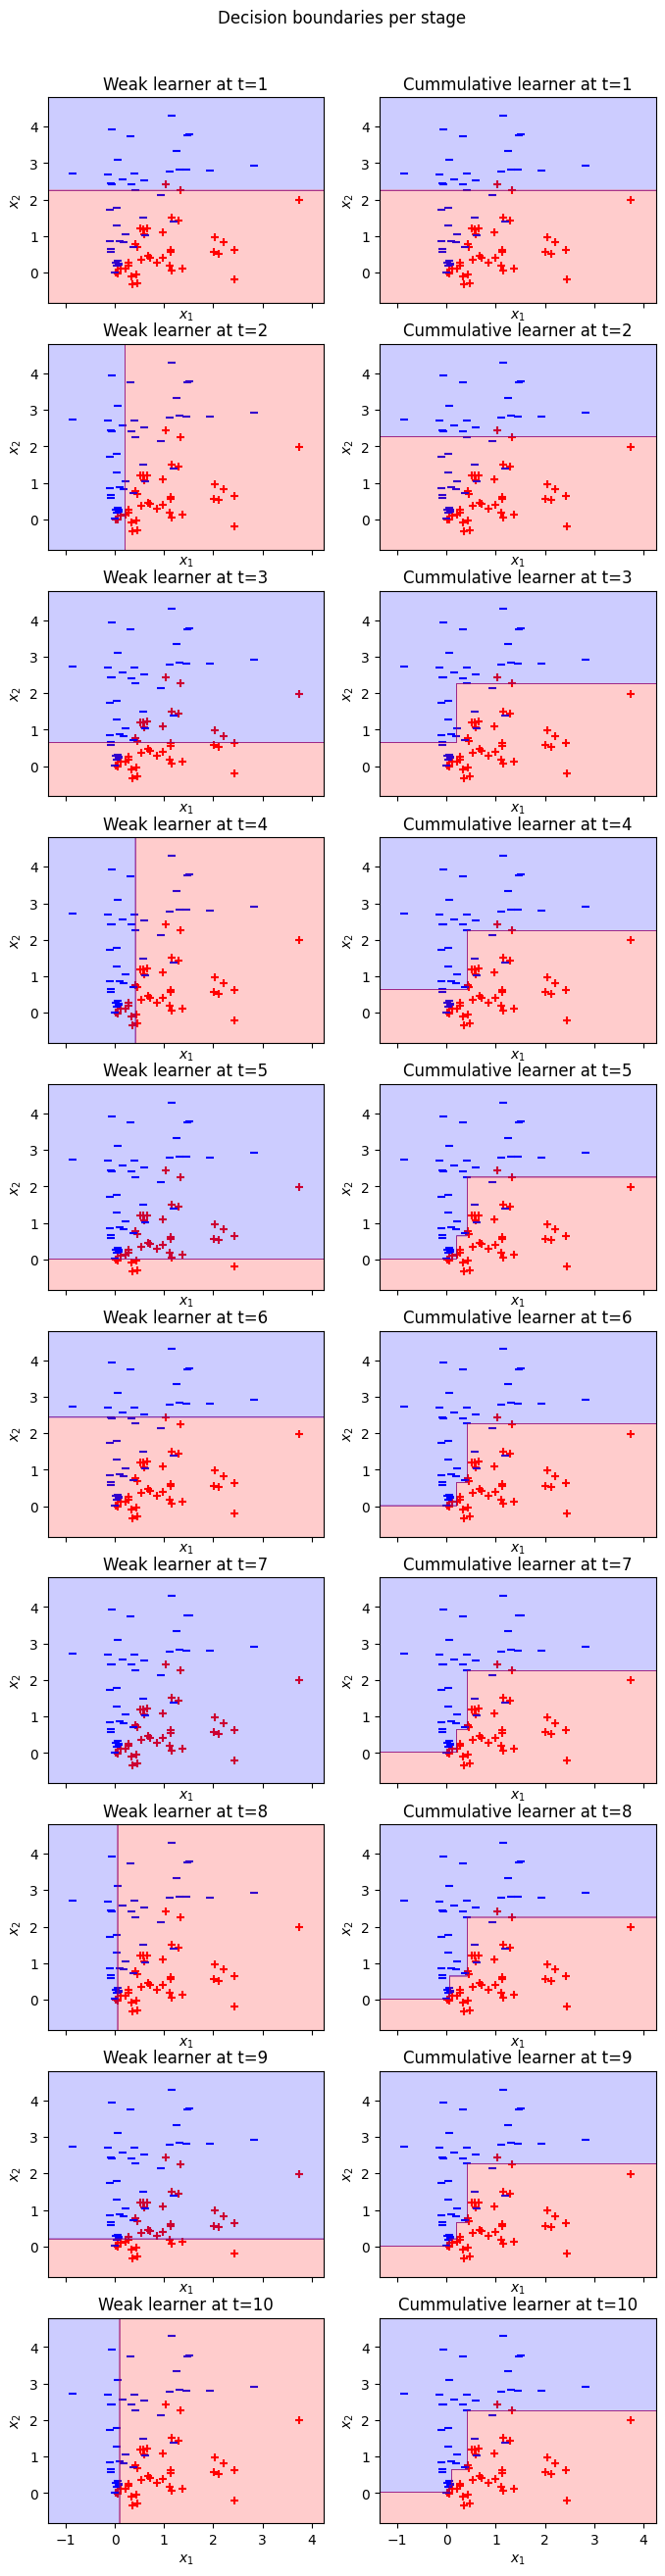

In [180]:
T=10
plotter(X_train,Y_train,store_all_stage_stumps,D,store_w_t_stages,T)

**Testing phase**

TESTING PHASE


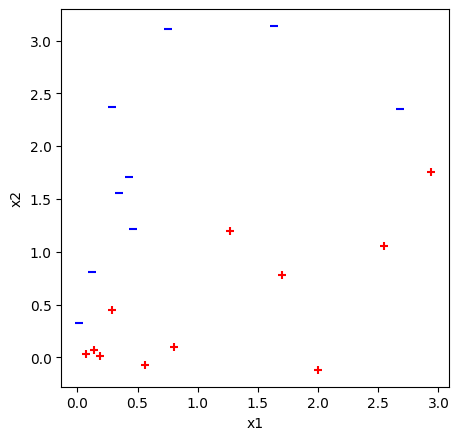

In [208]:
print("TESTING PHASE")
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
fig.set_facecolor('white')
X_test_pos = X_test[Y_test==1]
ax.scatter(*X_test_pos.T,marker='+',color='red')
X_test_neg = X_test[Y_test==-1]
ax.scatter(*X_test_neg.T,marker='_',color='blue')
ax.set_xlabel("x1")
ax.set_ylabel("x2")

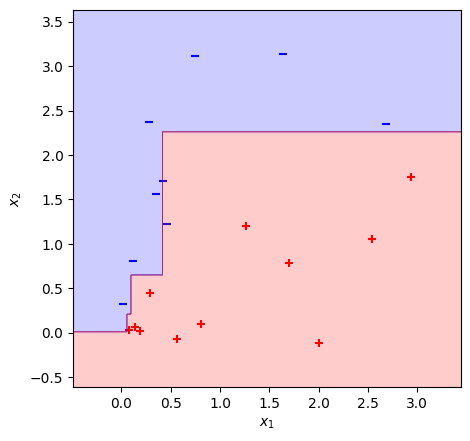

In [182]:
## testing phase

plot_adaboost(X_test,Y_test,store_all_stage_stumps[0:T],D[T-1],store_w_t_stages[0:T],None,flag=1)


In [183]:
Y_pred_test = predict(X_test,store_w_t_stages[0:T],store_all_stage_stumps[0:T],1)


In [184]:
print(Y_pred_test)

[ 1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.
  1.  1.]


In [185]:
print(Y_test)

[-1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.
 -1.  1.]


In [186]:
from sklearn.metrics import confusion_matrix,accuracy_score
def acc_confusion_matrix(y_true,y_pred,purpose):
  confusion_mat = confusion_matrix(y_true,y_pred)
  accuracy = accuracy_score(y_true,y_pred)
  print("purpose")
  print("confusion_matrix:\n",confusion_mat)

  correct = 0
  incorrect = 0
  for i in range(len(y_pred)):
    if y_pred[i] == y_true[i]:
      correct += 1
    elif y_pred[i] != y_true[i]:
      incorrect += 1

  if purpose == "train":
      print("training accuracy:",accuracy*100,"%")
      print("correct:",correct)
      print("incorrect:",incorrect)

  elif purpose == "test":
      print("testing accuracy:",accuracy*100,"%")
      print("correct:",correct)
      print("incorrect:",incorrect)


In [187]:
acc_confusion_matrix(Y_train,y_pred_train,purpose = "train")
acc_confusion_matrix(Y_test,Y_pred_test,purpose = "test")

purpose
confusion_matrix:
 [[37  4]
 [ 1 38]]
training accuracy: 93.75 %
correct: 75
incorrect: 5
purpose
confusion_matrix:
 [[ 7  2]
 [ 0 11]]
testing accuracy: 90.0 %
correct: 18
incorrect: 2


# Number of Stages = 5

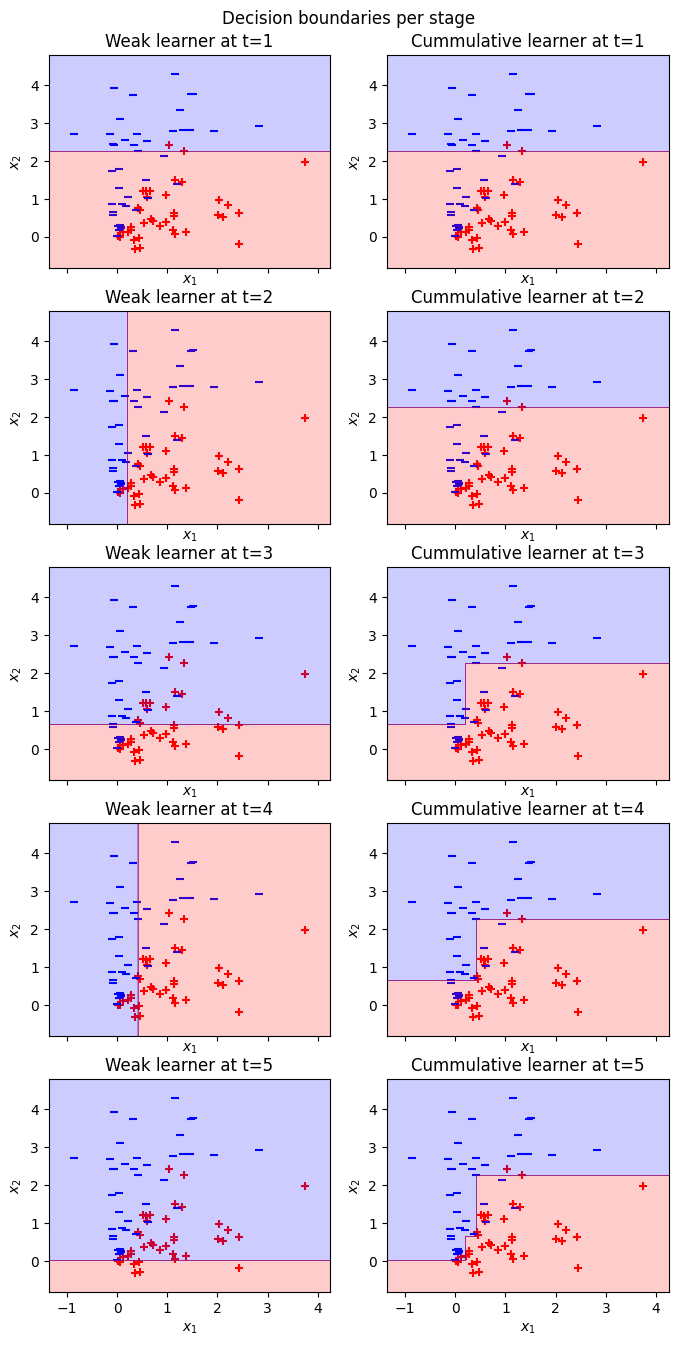

TESTING PHASE
[ 1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1.  1.
  1.  1.]
[-1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.
 -1.  1.]
purpose
confusion_matrix:
 [[37  4]
 [ 3 36]]
training accuracy: 91.25 %
correct: 73
incorrect: 7
purpose
confusion_matrix:
 [[7 2]
 [3 8]]
testing accuracy: 75.0 %
correct: 15
incorrect: 5


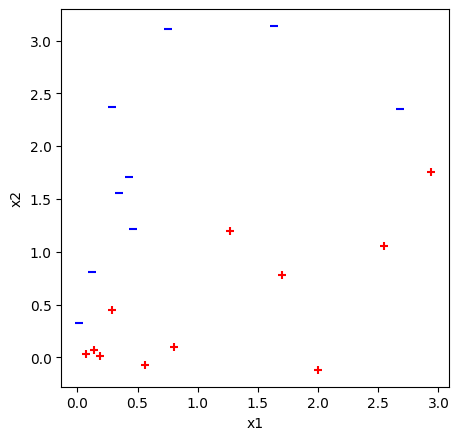

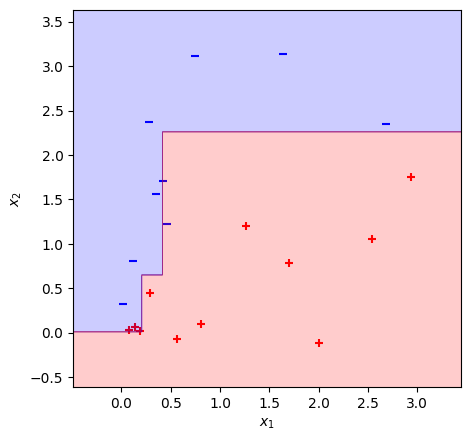

In [192]:
T=5
h_s_x,store_all_stage_errors,store_all_stage_stumps,store_w_t_stages,D = AdaBoost(X_train,Y_train,T)
y_pred_train = h_s_x
# print(y_pred_train)
# print(Y_train)
plotter(X_train,Y_train,store_all_stage_stumps,D,store_w_t_stages,T)
print("TESTING PHASE")
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
fig.set_facecolor('white')
X_test_pos = X_test[Y_test==1]
ax.scatter(*X_test_pos.T,marker='+',color='red')
X_test_neg = X_test[Y_test==-1]
ax.scatter(*X_test_neg.T,marker='_',color='blue')
ax.set_xlabel("x1")
ax.set_ylabel("x2")

## testing phase

plot_adaboost(X_test,Y_test,store_all_stage_stumps[0:T],D[T-1],store_w_t_stages[0:T],None,flag=1)
Y_pred_test = predict(X_test,store_w_t_stages[0:T],store_all_stage_stumps[0:T],1)
print(Y_pred_test)
print(Y_test)
acc_confusion_matrix(Y_train,y_pred_train,purpose = "train")
acc_confusion_matrix(Y_test,Y_pred_test,purpose = "test")

# Number of Stages = 15

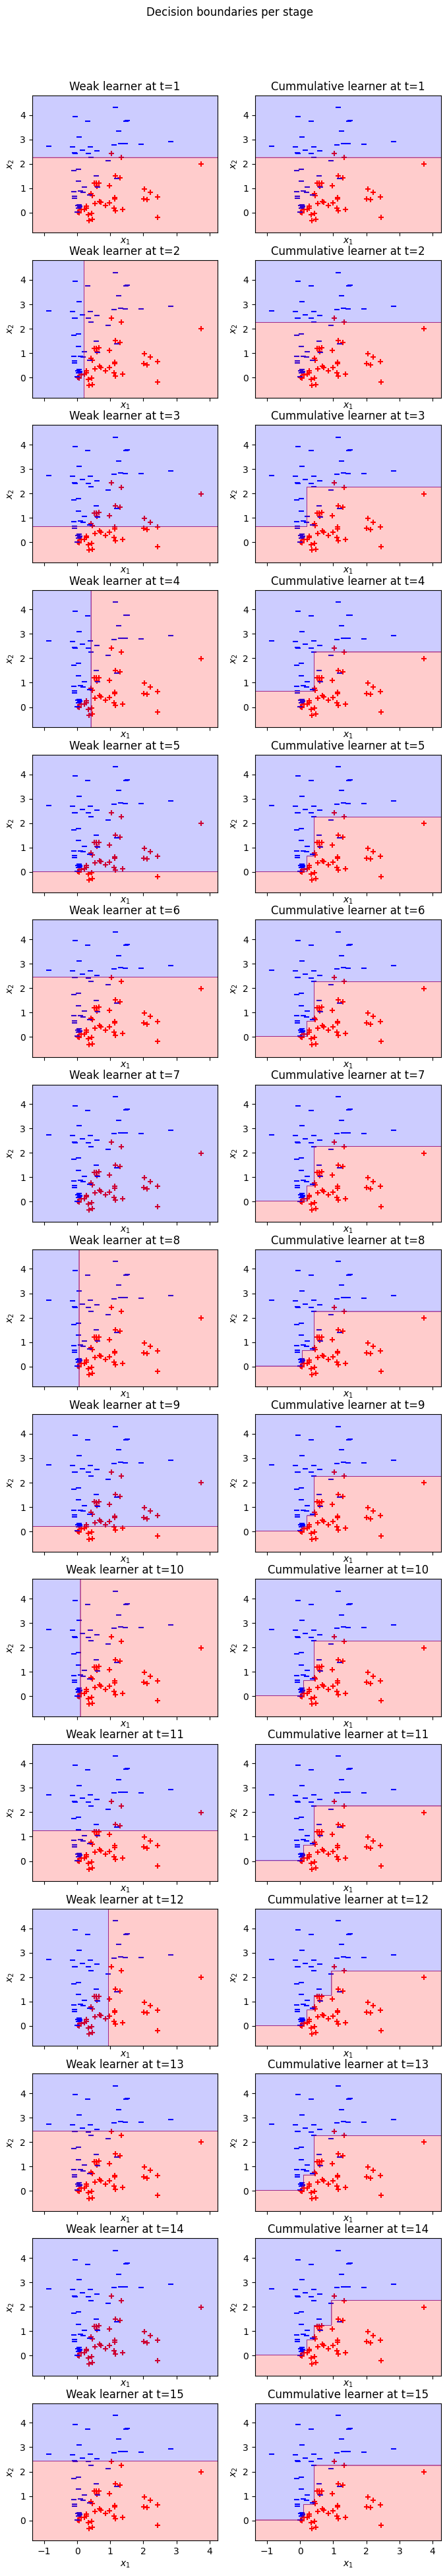

TESTING PHASE
[ 1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.
  1.  1.]
[-1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.
 -1.  1.]
purpose
confusion_matrix:
 [[37  4]
 [ 1 38]]
training accuracy: 93.75 %
correct: 75
incorrect: 5
purpose
confusion_matrix:
 [[ 7  2]
 [ 0 11]]
testing accuracy: 90.0 %
correct: 18
incorrect: 2


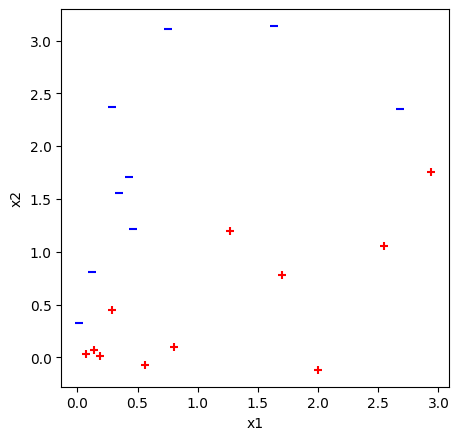

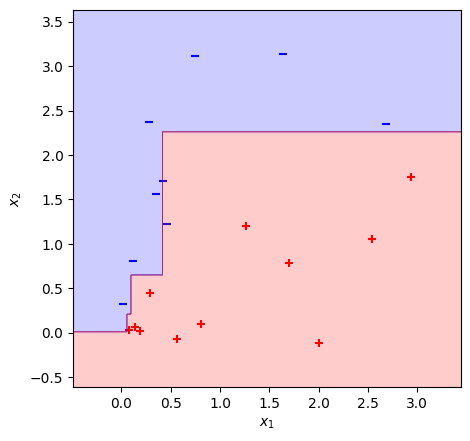

In [188]:
T=15
h_s_x,store_all_stage_errors,store_all_stage_stumps,store_w_t_stages,D = AdaBoost(X_train,Y_train,T)
y_pred_train = h_s_x
# print(y_pred_train)
# print(Y_train)
plotter(X_train,Y_train,store_all_stage_stumps,D,store_w_t_stages,T)
print("TESTING PHASE")
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
fig.set_facecolor('white')
X_test_pos = X_test[Y_test==1]
ax.scatter(*X_test_pos.T,marker='+',color='red')
X_test_neg = X_test[Y_test==-1]
ax.scatter(*X_test_neg.T,marker='_',color='blue')
ax.set_xlabel("x1")
ax.set_ylabel("x2")

## testing phase

plot_adaboost(X_test,Y_test,store_all_stage_stumps[0:T],D[T-1],store_w_t_stages[0:T],None,flag=1)
Y_pred_test = predict(X_test,store_w_t_stages[0:T],store_all_stage_stumps[0:T],1)
print(Y_pred_test)
print(Y_test)
acc_confusion_matrix(Y_train,y_pred_train,purpose = "train")
acc_confusion_matrix(Y_test,Y_pred_test,purpose = "test")

# Number of Stages = 20

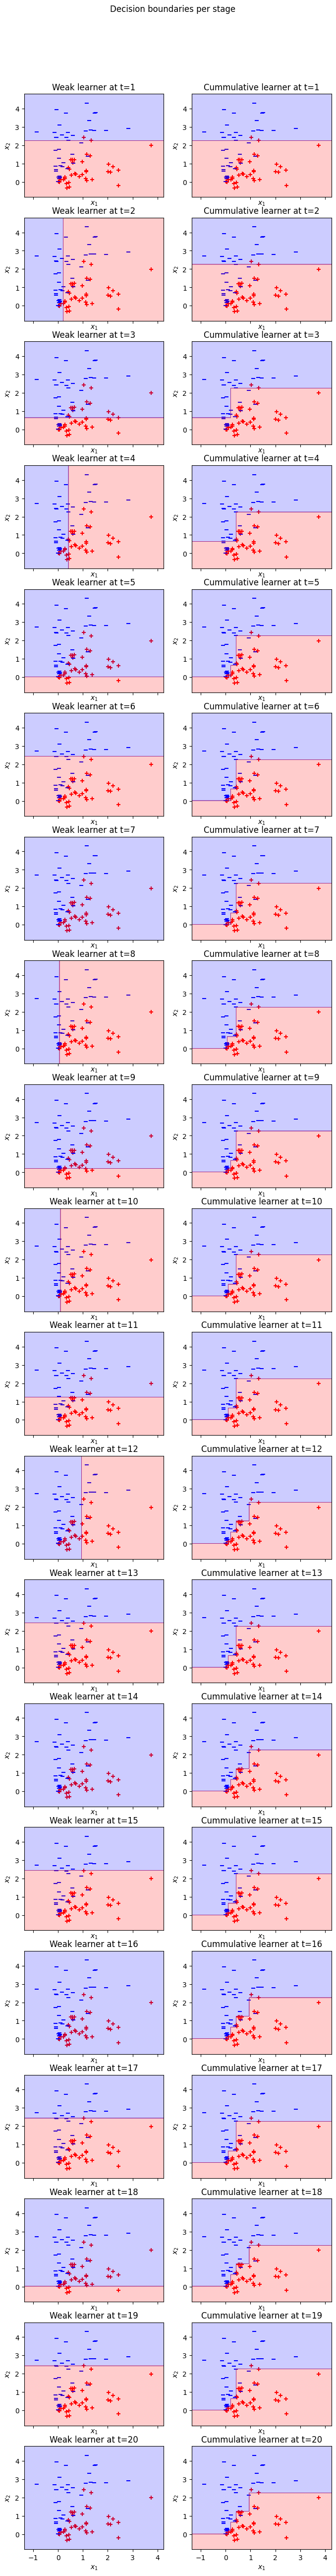

TESTING PHASE
[ 1.  1. -1.  1. -1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.
 -1.  1.]
[-1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.
 -1.  1.]
purpose
confusion_matrix:
 [[39  2]
 [ 2 37]]
training accuracy: 95.0 %
correct: 76
incorrect: 4
purpose
confusion_matrix:
 [[ 8  1]
 [ 1 10]]
testing accuracy: 90.0 %
correct: 18
incorrect: 2


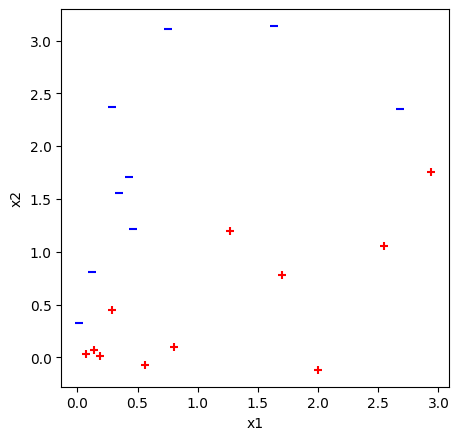

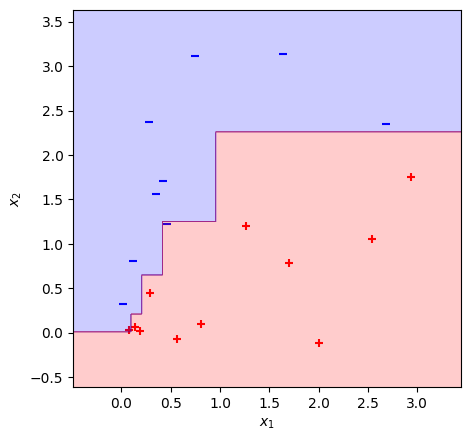

In [189]:
T=20
h_s_x,store_all_stage_errors,store_all_stage_stumps,store_w_t_stages,D = AdaBoost(X_train,Y_train,T)
y_pred_train = h_s_x
# print(y_pred_train)
# print(Y_train)
plotter(X_train,Y_train,store_all_stage_stumps,D,store_w_t_stages,T)
print("TESTING PHASE")
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
fig.set_facecolor('white')
X_test_pos = X_test[Y_test==1]
ax.scatter(*X_test_pos.T,marker='+',color='red')
X_test_neg = X_test[Y_test==-1]
ax.scatter(*X_test_neg.T,marker='_',color='blue')
ax.set_xlabel("x1")
ax.set_ylabel("x2")

## testing phase

plot_adaboost(X_test,Y_test,store_all_stage_stumps[0:T],D[T-1],store_w_t_stages[0:T],None,flag=1)
Y_pred_test = predict(X_test,store_w_t_stages[0:T],store_all_stage_stumps[0:T],1)
print(Y_pred_test)
print(Y_test)
acc_confusion_matrix(Y_train,y_pred_train,purpose = "train")
acc_confusion_matrix(Y_test,Y_pred_test,purpose = "test")

# Number of Stages = 25

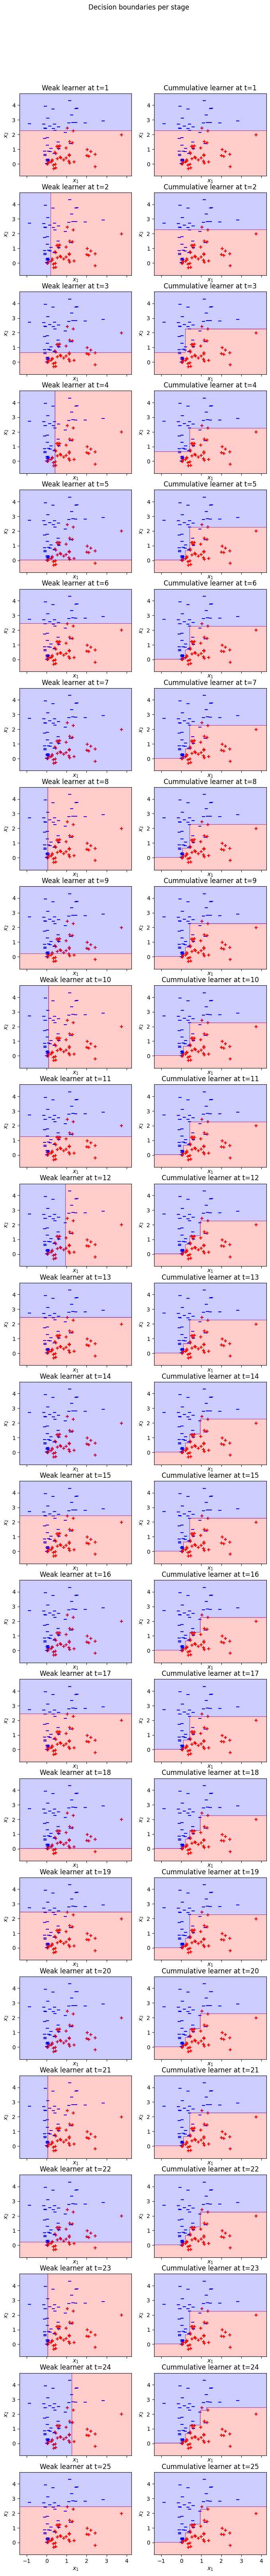

TESTING PHASE
[ 1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.
 -1.  1.]
[-1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.
 -1.  1.]
purpose
confusion_matrix:
 [[39  2]
 [ 1 38]]
training accuracy: 96.25 %
correct: 77
incorrect: 3
purpose
confusion_matrix:
 [[ 7  2]
 [ 0 11]]
testing accuracy: 90.0 %
correct: 18
incorrect: 2


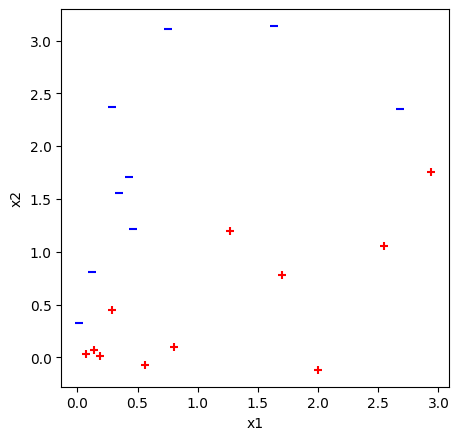

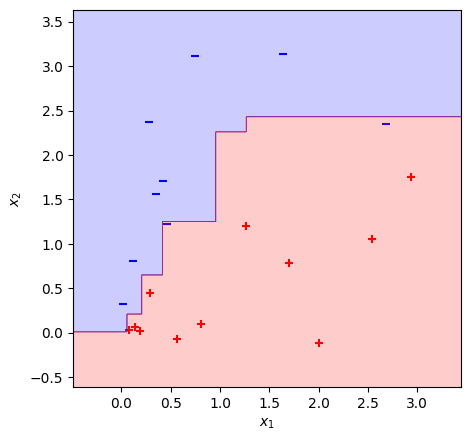

In [193]:
T=25
h_s_x,store_all_stage_errors,store_all_stage_stumps,store_w_t_stages,D = AdaBoost(X_train,Y_train,T)
y_pred_train = h_s_x
# print(y_pred_train)
# print(Y_train)
plotter(X_train,Y_train,store_all_stage_stumps,D,store_w_t_stages,T)
print("TESTING PHASE")
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
fig.set_facecolor('white')
X_test_pos = X_test[Y_test==1]
ax.scatter(*X_test_pos.T,marker='+',color='red')
X_test_neg = X_test[Y_test==-1]
ax.scatter(*X_test_neg.T,marker='_',color='blue')
ax.set_xlabel("x1")
ax.set_ylabel("x2")

## testing phase

plot_adaboost(X_test,Y_test,store_all_stage_stumps[0:T],D[T-1],store_w_t_stages[0:T],None,flag=1)
Y_pred_test = predict(X_test,store_w_t_stages[0:T],store_all_stage_stumps[0:T],1)
print(Y_pred_test)
print(Y_test)
acc_confusion_matrix(Y_train,y_pred_train,purpose = "train")
acc_confusion_matrix(Y_test,Y_pred_test,purpose = "test")

# Number of Stages = 30

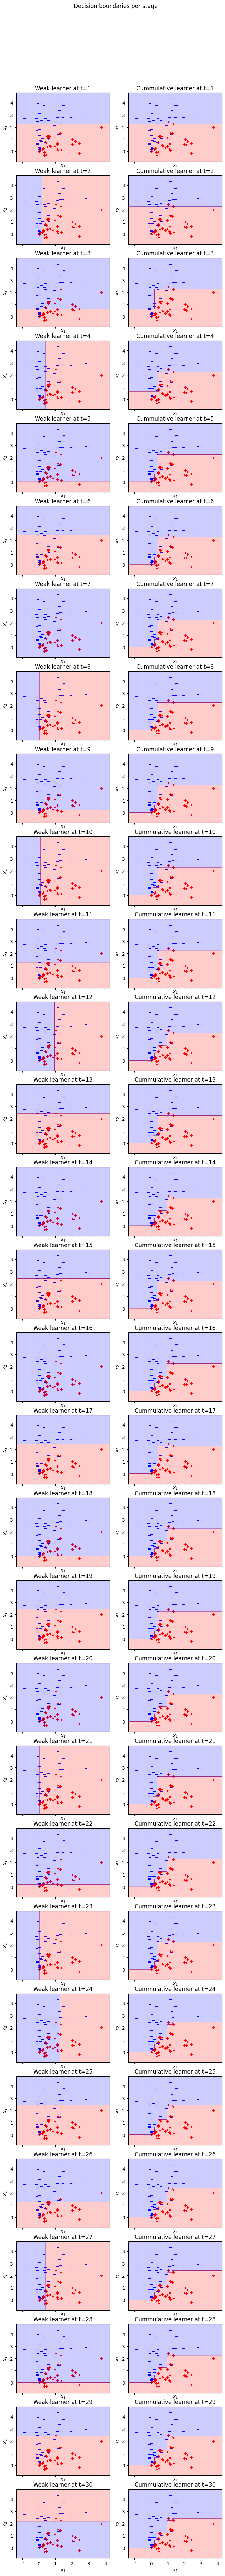

TESTING PHASE
[ 1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.
 -1.  1.]
[-1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.
 -1.  1.]
purpose
confusion_matrix:
 [[39  2]
 [ 1 38]]
training accuracy: 96.25 %
correct: 77
incorrect: 3
purpose
confusion_matrix:
 [[ 7  2]
 [ 0 11]]
testing accuracy: 90.0 %
correct: 18
incorrect: 2


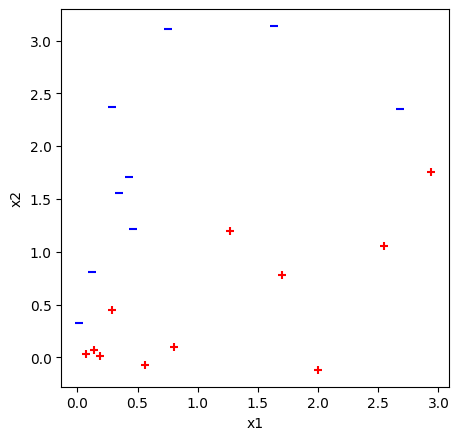

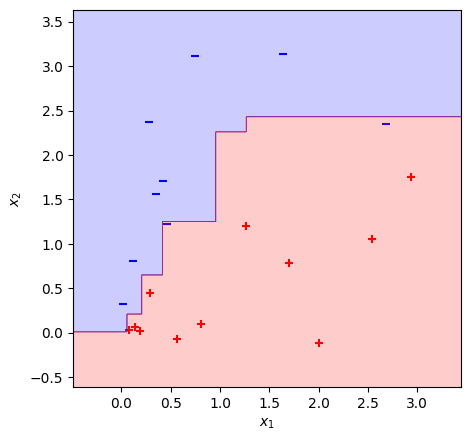

In [190]:
T=30
h_s_x,store_all_stage_errors,store_all_stage_stumps,store_w_t_stages,D = AdaBoost(X_train,Y_train,T)
y_pred_train = h_s_x
# print(y_pred_train)
# print(Y_train)
plotter(X_train,Y_train,store_all_stage_stumps,D,store_w_t_stages,T)
print("TESTING PHASE")
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
fig.set_facecolor('white')
X_test_pos = X_test[Y_test==1]
ax.scatter(*X_test_pos.T,marker='+',color='red')
X_test_neg = X_test[Y_test==-1]
ax.scatter(*X_test_neg.T,marker='_',color='blue')
ax.set_xlabel("x1")
ax.set_ylabel("x2")

## testing phase

plot_adaboost(X_test,Y_test,store_all_stage_stumps[0:T],D[T-1],store_w_t_stages[0:T],None,flag=1)
Y_pred_test = predict(X_test,store_w_t_stages[0:T],store_all_stage_stumps[0:T],1)
print(Y_pred_test)
print(Y_test)
acc_confusion_matrix(Y_train,y_pred_train,purpose = "train")
acc_confusion_matrix(Y_test,Y_pred_test,purpose = "test")

# Number of Stages = 80

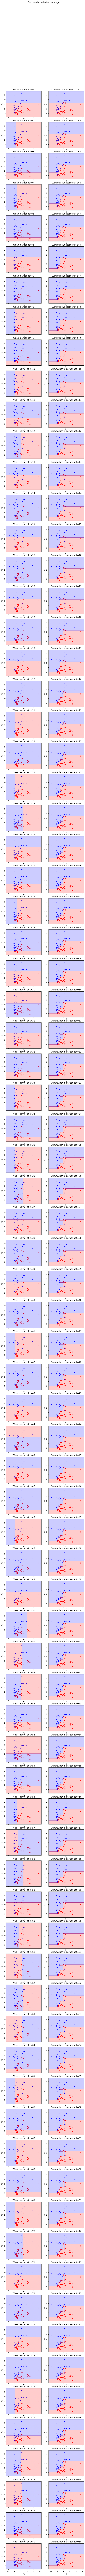

TESTING PHASE
[ 1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.
 -1.  1.]
[-1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.
 -1.  1.]
purpose
confusion_matrix:
 [[41  0]
 [ 0 39]]
training accuracy: 100.0 %
correct: 80
incorrect: 0
purpose
confusion_matrix:
 [[ 7  2]
 [ 0 11]]
testing accuracy: 90.0 %
correct: 18
incorrect: 2


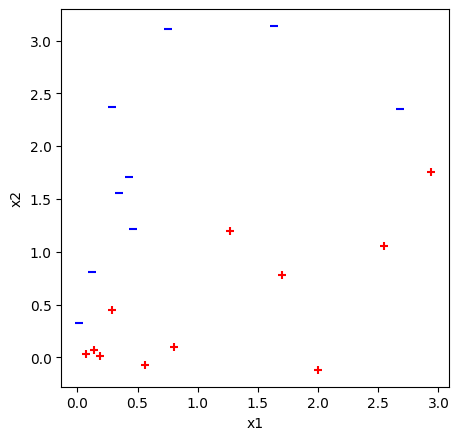

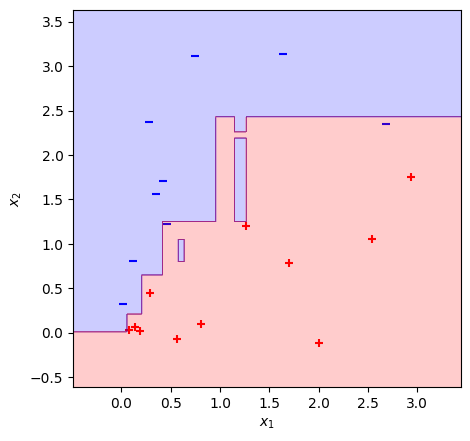

In [206]:
T=80
h_s_x,store_all_stage_errors,store_all_stage_stumps,store_w_t_stages,D = AdaBoost(X_train,Y_train,T)
y_pred_train = h_s_x
# print(y_pred_train)
# print(Y_train)
plotter(X_train,Y_train,store_all_stage_stumps,D,store_w_t_stages,T)
print("TESTING PHASE")
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
fig.set_facecolor('white')
X_test_pos = X_test[Y_test==1]
ax.scatter(*X_test_pos.T,marker='+',color='red')
X_test_neg = X_test[Y_test==-1]
ax.scatter(*X_test_neg.T,marker='_',color='blue')
ax.set_xlabel("x1")
ax.set_ylabel("x2")

## testing phase

plot_adaboost(X_test,Y_test,store_all_stage_stumps[0:T],D[T-1],store_w_t_stages[0:T],None,flag=1)
Y_pred_test = predict(X_test,store_w_t_stages[0:T],store_all_stage_stumps[0:T],1)
print(Y_pred_test)
print(Y_test)
acc_confusion_matrix(Y_train,y_pred_train,purpose = "train")
acc_confusion_matrix(Y_test,Y_pred_test,purpose = "test")